### Finance Project

In [2]:
# Need to get information about the following
'''
Bank of America 
CitiGroup
Goldman Sachs
JPMorgan Chase
Morgan Stanley
Wells Fargo
'''


'\nBank of America \nCitiGroup\nGoldman Sachs\nJPMorgan Chase\nMorgan Stanley\nWells Fargo\n'

In [3]:
# Importing the necessary libraries

import pandas_datareader.data as web
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# obtaining different stock information of different banks

start_time = dt.datetime(2006, 1, 1)
end_time = dt.datetime(2016, 1, 1)
#Bank of America
BAC = web.DataReader('BAC', 'yahoo', start_time, end_time)
#CitiGroup
C = web.DataReader('C', 'yahoo', start_time, end_time)
#Goldman Sachs
GS = web.DataReader('GS', 'yahoo', start_time, end_time)
#JPMorgan Chase
JPM = web.DataReader('JPM', 'yahoo', start_time, end_time)
#Morgan Stanley
MS = web.DataReader('MS', 'yahoo', start_time, end_time)
#Wells Fargo
WFC = web.DataReader('WFC', 'yahoo', start_time, end_time)

In [5]:
# Example Data Frame

BAC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,34.280807
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,33.916729
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,33.960411
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,33.909451
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,33.931290


In [6]:
# Need to Drop Adj Close, Not Needed Info

banks = [BAC, C, GS, JPM, MS, WFC]

for bank in banks: 
    
    bank.drop(columns='Adj Close', inplace=True)

In [7]:
BAC.head()

,High,Low,Open,Close,Volume
Date,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0


In [8]:
BAC = BAC.reindex(columns=['Open', 'High', 'Low', 'Close', 'Volume'])
C = C.reindex(columns=['Open', 'High', 'Low', 'Close', 'Volume'])
GS = GS.reindex(columns=['Open', 'High', 'Low', 'Close', 'Volume'])
JPM = JPM.reindex(columns=['Open', 'High', 'Low', 'Close', 'Volume'])
MS = MS.reindex(columns=['Open', 'High', 'Low', 'Close', 'Volume'])
WFC = WFC.reindex(columns=['Open', 'High', 'Low', 'Close', 'Volume'])

In [9]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)

In [10]:
bank_stocks.head()

BAC                                               \
                 Open       High        Low      Close      Volume   
Date                                                                 
2006-01-03  46.919998  47.180000  46.150002  47.080002  16296700.0   
2006-01-04  47.000000  47.240002  46.450001  46.580002  17757900.0   
2006-01-05  46.580002  46.830002  46.320000  46.639999  14970700.0   
2006-01-06  46.799999  46.910000  46.349998  46.570000  12599800.0   
2006-01-09  46.720001  46.970001  46.360001  46.599998  15619400.0   

                     C                                                 ...  \
                  Open        High         Low       Close     Volume  ...   
Date                                                                   ...   
2006-01-03  490.000000  493.799988  481.100006  492.899994  1537600.0  ...   
2006-01-04  488.600006  491.000000  483.500000  483.799988  1870960.0  ...   
2006-01-05  484.399994  487.799988  484.000000  486.200012  1143160.0  ...   
2006-01-06  488.799988  489.000000  482.000000  486.200012  1370210.0  ...   
2006-01-09  486.000000  487.399994  483.000000  483.899994  1680740.0  ...   

                   MS                                                    WFC  \
                 Open       High        Low      Close     Volume       Open   
Date                                                                           
2006-01-03  57.169998  58.490002  56.740002  58.310001  5377000.0  31.600000   
2006-01-04  58.700001  59.279999  58.349998  58.349998  7977800.0  31.799999   
2006-01-05  58.549999  58.590000  58.020000  58.509998  5778000.0  31.500000   
2006-01-06  58.770000  58.849998  58.049999  58.570000  6889800.0  31.580000   
2006-01-09  58.630001  59.290001  58.619999  59.189999  4144500.0  31.674999   

                                                         
                 High        Low      Close      Volume  
Date                                                     
2006-01-03  31.975000  31.195000  31.900000  11016400.0  
2006-01-04  31.820000  31.365000  31.530001  10870000.0  
2006-01-05  31.555000  31.309999  31.495001  10158000.0  
2006-01-06  31.775000  31.385000  31.680000   8403800.0  
2006-01-09  31.825001  31.555000  31.674999   5619600.0  

[5 rows x 30 columns]

In [11]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

###### ** What is the max Close price for each bank's stock throughout the time period?**

In [12]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        Open       High        Low      Close      Volume   
Date                                                                  
2006-01-03   46.919998  47.180000  46.150002  47.080002  16296700.0   
2006-01-04   47.000000  47.240002  46.450001  46.580002  17757900.0   
2006-01-05   46.580002  46.830002  46.320000  46.639999  14970700.0   
2006-01-06   46.799999  46.910000  46.349998  46.570000  12599800.0   
2006-01-09   46.720001  46.970001  46.360001  46.599998  15619400.0   

Bank Ticker           C                                                 ...  \
Stock Info         Open        High         Low       Close     Volume  ...   
Date                                                                    ...   
2006-01-03   490.000000  493.799988  481.100006  492.899994  1537600.0  ...   
2006-01-04   488.600006  491.000000  483.500000  483.799988  1870960.0  ...   
2006-01-05   484.399994  487.799988  484.000000  486.200012  1143160.0  ...   
2006-01-06   488.799988  489.000000  482.000000  486.200012  1370210.0  ...   
2006-01-09   486.000000  487.399994  483.000000  483.899994  1680740.0  ...   

Bank Ticker         MS                                                    WFC  \
Stock Info        Open       High        Low      Close     Volume       Open   
Date                                                                            
2006-01-03   57.169998  58.490002  56.740002  58.310001  5377000.0  31.600000   
2006-01-04   58.700001  59.279999  58.349998  58.349998  7977800.0  31.799999   
2006-01-05   58.549999  58.590000  58.020000  58.509998  5778000.0  31.500000   
2006-01-06   58.770000  58.849998  58.049999  58.570000  6889800.0  31.580000   
2006-01-09   58.630001  59.290001  58.619999  59.189999  4144500.0  31.674999   

Bank Ticker                                               
Stock Info        High        Low      Close      Volume  
Date                                                      
2006-01-03   31.975000  31.195000  31.900000  11016400.0  
2006-01-04   31.820000  31.365000  31.530001  10870000.0  
2006-01-05   31.555000  31.309999  31.495001  10158000.0  
2006-01-06   31.775000  31.385000  31.680000   8403800.0  
2006-01-09   31.825001  31.555000  31.674999   5619600.0  

[5 rows x 30 columns]

In [13]:
bank_stocks.xs('Close', level='Stock Info', axis=1).max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

From this query, we can see that CitiGroup Banking had the greatest Close price.

In [14]:
# empty dataframe

returns = pd.DataFrame()

In [15]:
# apply pandas.pct_change()

close_bank_stocks = bank_stocks.xs('Close', level='Stock Info', axis=1).copy()

In [16]:
close_bank_stocks.head()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,47.080002,492.899994,128.869995,40.189999,58.310001,31.900000
2006-01-04,46.580002,483.799988,127.089996,39.619999,58.349998,31.530001
2006-01-05,46.639999,486.200012,127.040001,39.740002,58.509998,31.495001
2006-01-06,46.570000,486.200012,128.839996,40.020000,58.570000,31.680000
2006-01-09,46.599998,483.899994,130.389999,40.669998,59.189999,31.674999


In [17]:
for bank in close_bank_stocks.columns.values:
    
    close_bank_stocks[bank] = close_bank_stocks.loc[:, bank].pct_change()
#

In [18]:
close_bank_stocks.head()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


In [19]:
# Renaming the column names for clarity

close_bank_stocks.columns.names = [""]
close_bank_stocks.rename(columns={'BAC': 'BAC Return', 
                                  'C': 'C Return',
                                  'GS': 'GS Return',
                                  'JPM': 'JPM Return',
                                  'MS': 'MS Return',
                                  'WFC': 'WFC Return'
                                 }, inplace=True)

In [20]:
close_bank_stocks.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


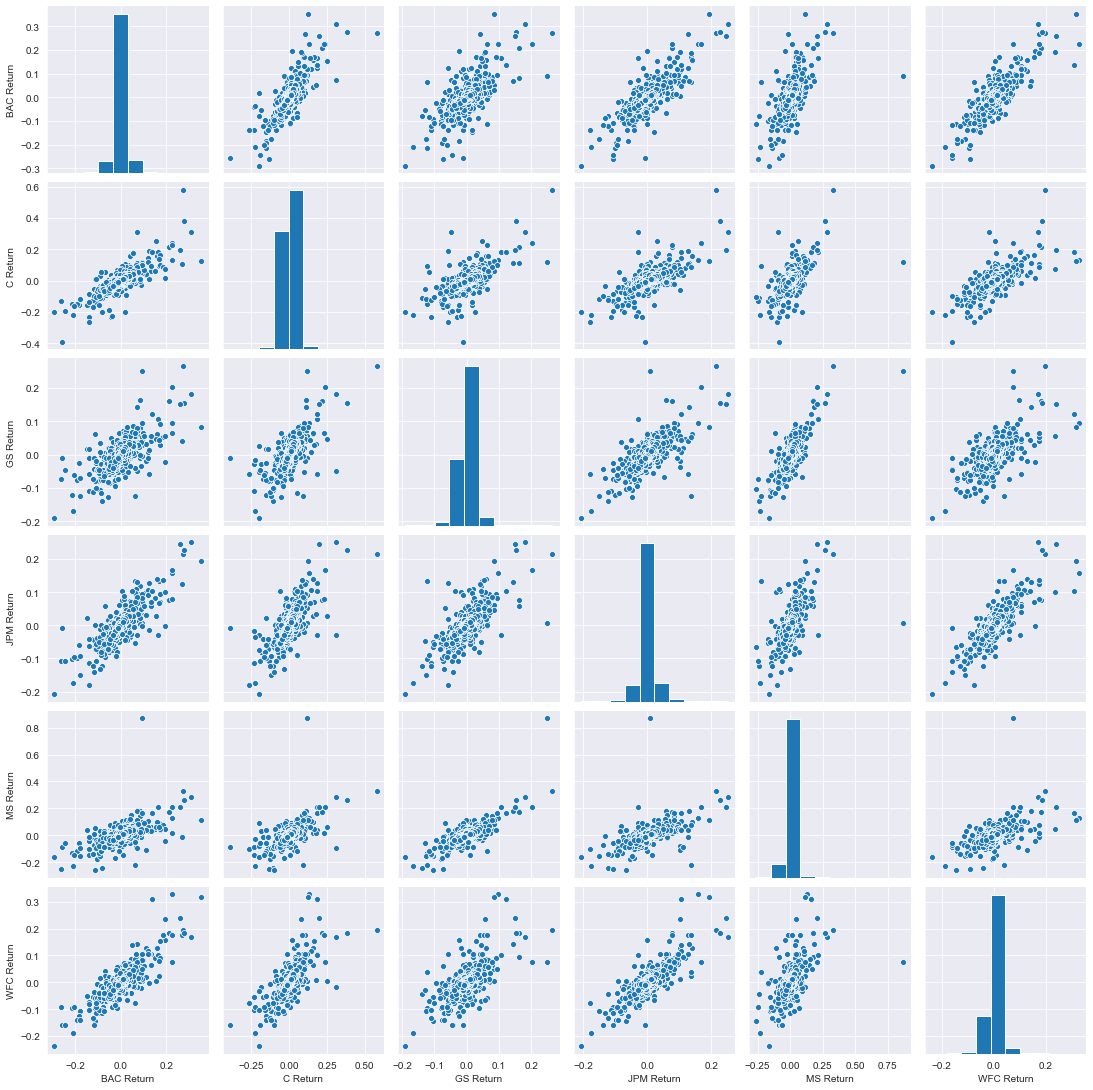

In [77]:
sns.set_style('darkgrid')
sns.pairplot(data=close_bank_stocks)
plt.show()

In [46]:
# Best Return Dates
print("--Best Single Stock Dates --")
for return_bank in close_bank_stocks.columns.values:
    
    date = close_bank_stocks[return_bank].sort_values(ascending = False).index[0].strftime('%m-%d-%Y')
    
    print(return_bank + ": " + date)


--Best Single Stock Dates --
BAC Return: 04-09-2009
C Return: 11-24-2008
GS Return: 11-24-2008
JPM Return: 01-21-2009
MS Return: 10-13-2008
WFC Return: 07-16-2008


In [48]:
# Worst Return Dates
print("-- Worst Return Code Dates--")
for return_bank in close_bank_stocks.columns.values:
    
    date = close_bank_stocks[return_bank].sort_values(ascending = True).index[0].strftime('%m-%d-%Y')
    
    print(return_bank + ": " + date)

-- Worst Return Code Dates--
BAC Return: 01-20-2009
C Return: 02-27-2009
GS Return: 01-20-2009
JPM Return: 01-20-2009
MS Return: 10-09-2008
WFC Return: 01-20-2009


In [53]:
# Looking at the standard deviation of the returns
# CitiGroup is the riskiest stock
close_bank_stocks.describe().loc['std']


BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
Name: std, dtype: float64

In [89]:
returns_of_2015 = close_bank_stocks.loc['2015-01-01': '2015-12-31']

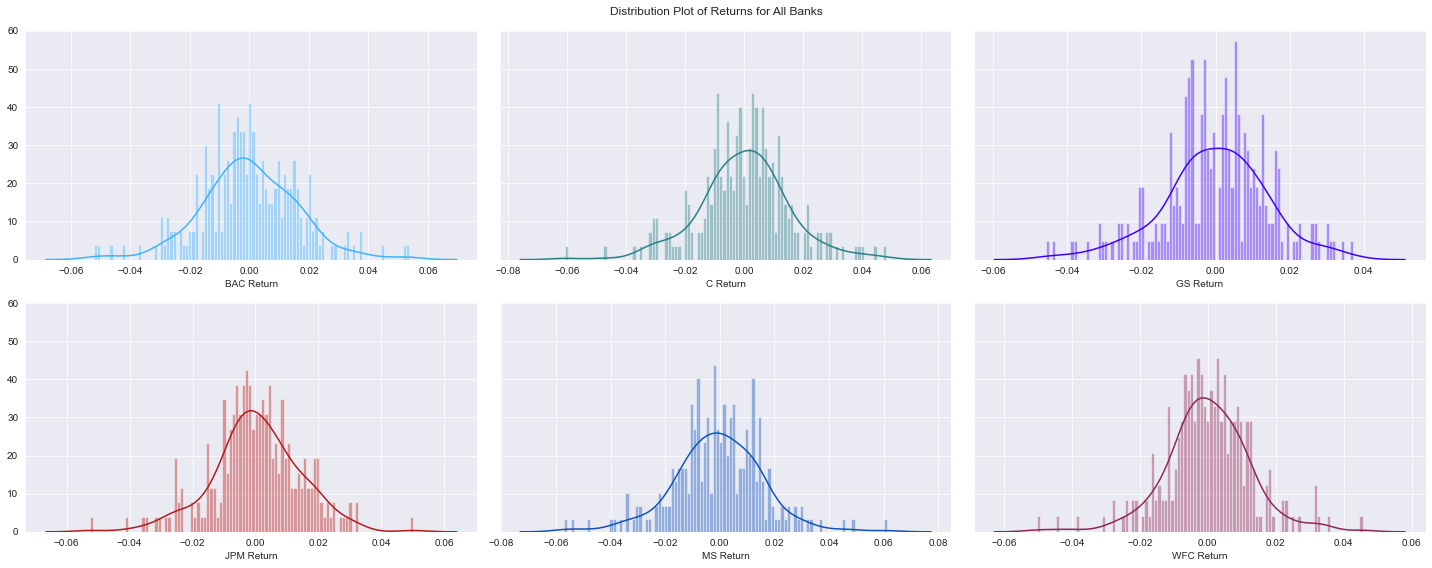

In [115]:
# distribution plot of returns for all banks

sns.set_style('darkgrid')
fig, axes = plt.subplots(2, 3, sharey = True, figsize=(20, 8))
fig.suptitle('Distribution Plot of Returns for All Banks')

sns.distplot(returns_of_2015['BAC Return'], bins = 100, color ="#3DB2FF", ax=axes[0, 0])
sns.distplot(returns_of_2015['C Return'], bins = 100, color ="#297F87", ax=axes[0, 1])
sns.distplot(returns_of_2015['GS Return'], bins = 100, color ="#3E00FF", ax=axes[0, 2])
sns.distplot(returns_of_2015['JPM Return'], bins = 100, color ="#B61919", ax=axes[1, 0])
sns.distplot(returns_of_2015['MS Return'], bins = 100, color ="#0F52BA", ax=axes[1, 1])
sns.distplot(returns_of_2015['WFC Return'], bins = 100, color ="#8E2657", ax=axes[1, 2])

plt.tight_layout()

In [123]:
# modifiying bank_stocks to only have close returns 

close_bank_stocks = bank_stocks.copy().xs('Close', level='Stock Info', axis=1)

In [124]:
close_bank_stocks.head()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,47.080002,492.899994,128.869995,40.189999,58.310001,31.900000
2006-01-04,46.580002,483.799988,127.089996,39.619999,58.349998,31.530001
2006-01-05,46.639999,486.200012,127.040001,39.740002,58.509998,31.495001
2006-01-06,46.570000,486.200012,128.839996,40.020000,58.570000,31.680000
2006-01-09,46.599998,483.899994,130.389999,40.669998,59.189999,31.674999


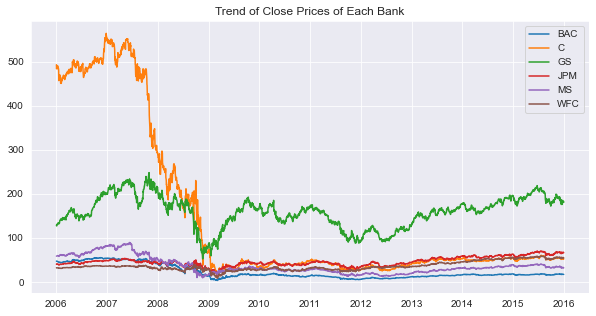

In [175]:
fig = plt.figure(figsize=(10, 5))

for bank in close_bank_stocks.columns.values:
    
    plt.plot(close_bank_stocks.index, close_bank_stocks[bank].values)
    
plt.legend(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'])
plt.title('Trend of Close Prices of Each Bank')

plt.show()

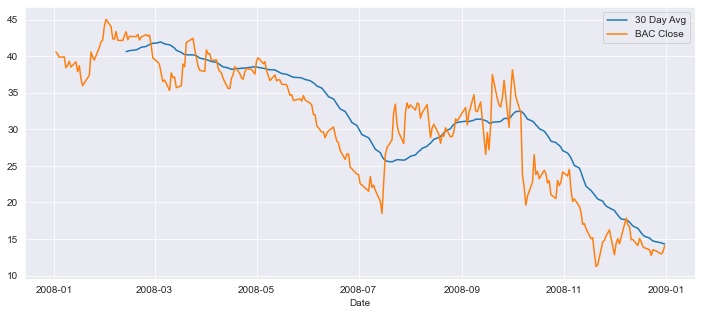

In [176]:
# Plotting Rollin 30 Day Average

fig = plt.figure(figsize=(12, 5))

close_BAC = close_bank_stocks.loc['2008-01-01':'2008-12-31']['BAC'].rolling(window=30).mean()
plt.plot(close_BAC.index, close_BAC.values)
plt.plot(close_bank_stocks.loc['2008-01-01':'2008-12-31']['BAC'].index,
         close_bank_stocks.loc['2008-01-01':'2008-12-31']['BAC'].values )


plt.legend(['30 Day Avg', 'BAC Close'])
plt.xlabel('Date')
plt.show()

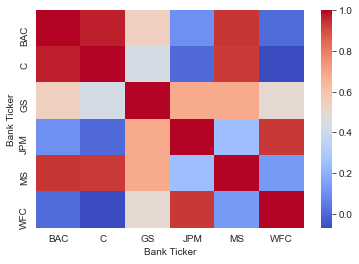

In [177]:
# heatmap

close_cluster = close_bank_stocks.corr()

sns.heatmap(close_cluster, cmap="coolwarm")

plt.show()

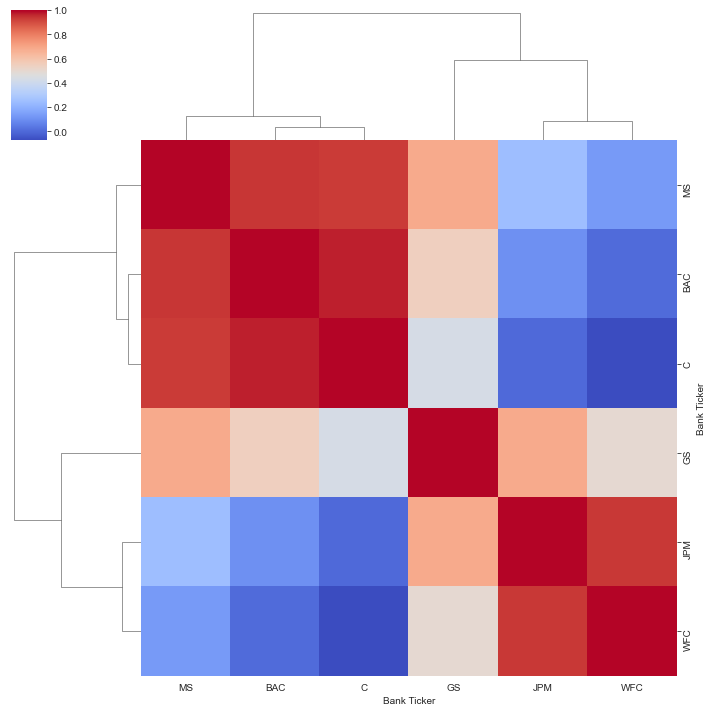

In [178]:
#clustermap

sns.clustermap(close_cluster, cmap="coolwarm")
plt.show()